In [6]:
import numpy as np

from qiskit.algorithms.state_fidelities import ComputeUncompute
from qiskit.algorithms.time_evolvers import TimeEvolutionProblem, PVQD
from qiskit.primitives import Estimator, Sampler
from qiskit.circuit.library import EfficientSU2
from qiskit.quantum_info import SparsePauliOp, Pauli
from qiskit.algorithms.optimizers import L_BFGS_B

In [7]:

sampler = Sampler()
fidelity = ComputeUncompute(sampler)
estimator = Estimator()
hamiltonian = 0.1 * SparsePauliOp(["ZZ", "IX", "XI"])
observable = Pauli("ZZ")
ansatz = EfficientSU2(2, reps=1)
initial_parameters = np.zeros(ansatz.num_parameters)

In [8]:
time = 1
optimizer = L_BFGS_B()

# setup the algorithm
pvqd = PVQD(
    fidelity,
    ansatz,
    initial_parameters,
    estimator,
    num_timesteps=100,
    optimizer=optimizer,
)

In [9]:
# specify the evolution problem
problem = TimeEvolutionProblem(
    hamiltonian, time, aux_operators=[hamiltonian, observable]
)

# and evolve!
result = pvqd.evolve(problem)

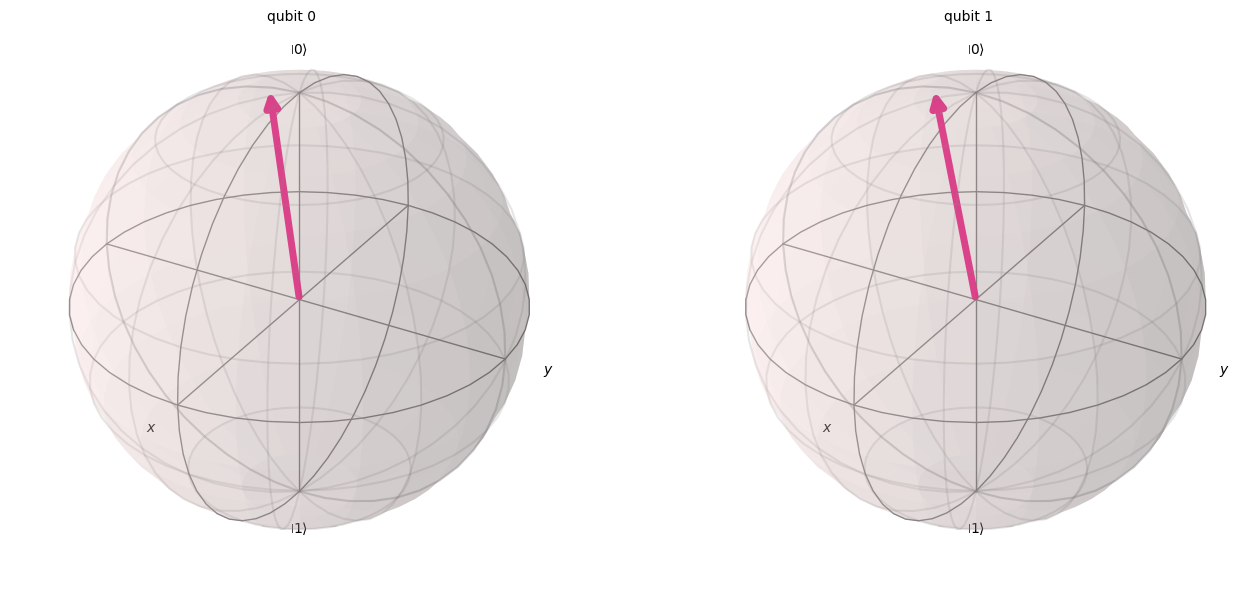

In [10]:
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector
quantum_state = Statevector.from_instruction(result.evolved_state)
plot_bloch_multivector(quantum_state)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


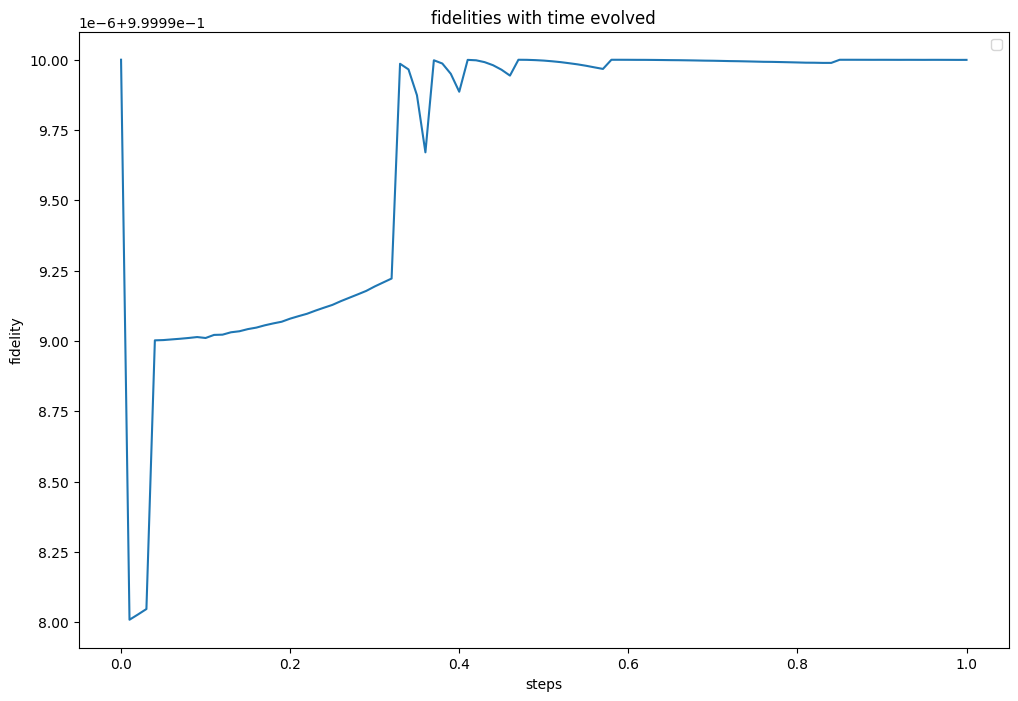

In [19]:
import numpy as np
import matplotlib.pyplot as plt
g1=plt

g1.rcParams["figure.figsize"] = (12, 8)


_counts = result.fidelities
_values = result.times
g1.plot(_values, _counts)
g1.xlabel("steps")
g1.ylabel("fidelity")
g1.title("fidelities with time evolved")
g1.legend(loc="upper right")
g1.show()

ComputeUnCompute uses the sampler primitive to calculate the state fidelity of two quantum circuits following the compute-uncompute method

fedility (state overlap): <img src=images/cuc_sol.png />

The initial release of Qiskit Runtime includes two primitives:

Sampler: Generates quasi-probability distribution from input circuits.

Estimator: Calculates expectation values from input circuits and observables.

In [17]:
print( result.times)

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35000000000000003, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41000000000000003, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47000000000000003, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.5700000000000001, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.6900000000000001, 0.7000000000000001, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.8200000000000001, 0.8300000000000001, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.9400000000000001, 0.9500000000000001, 0.96, 0.97, 0.98, 0.99, 1.0]
